# Unsupervised learning

Here we look at two kinds of unsupervied learning algorithms:
* transformations of the dataset:create a new representation of data which might be easier to understand by human or ml algorithms
* clustering: partition data into distinct groups

Challenges in unsupervised learning:
* evaluating
* often the only way to evaluate the result of an unsuperviesed algorithm is to inspect it manually, s a consequence, unsupervised learning algorithms are used often in exploratory setting, when a data scientist wants to understand the data better, rather than as part of a large automatic system
* another common application for them is as a preprocessing step for supervised learning algorithms

### Preprocessing and Scaling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
import warnings
warnings.filterwarnings('ignore')

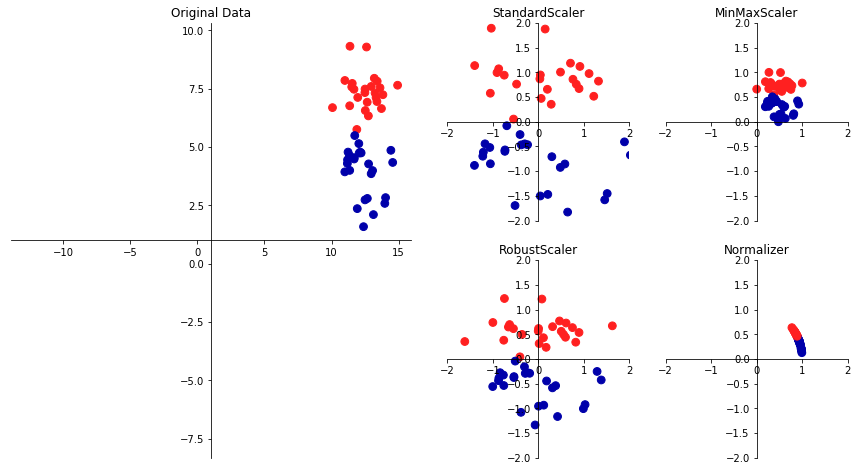

In [2]:
mglearn.plots.plot_scaling()

### Different kinds of preprocessing
* StandardScaler: ensures that for each feature the mean is 0 and the variance is 1, does not particular minimum or maximum
* RobustScaler: similar to StandardScaler, but use median and quartiles, thus more robust against outliers
* MinMaxScaler: Shifts the data such that all features are exactly between 0 and 1
* Normalizer: scales each data point such that the feature vector has a length of 1, often used when only the direction of data matters

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [4]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=1)
print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
scaler = MinMaxScaler().fit(X_train)

In [7]:
X_train_scaled = scaler.transform(X_train)
print('transformed shape: {}'.format(X_train_scaled.shape))
print('per-feature minimum before scaling: \n{}'.format(X_train.min(axis=0)))
print('per-feature maximum before scaling: \n{}'.format(X_train.max(axis=0)))
print('per-feature minimum after scaling: \n{}'.format(X_train_scaled.min(axis=0)))
print('per-feature maximum after scaling: \n{}'.format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling: 
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [8]:
X_test_scaled = scaler.transform(X_test)

In [9]:
print('per-feature minimum after scaling: \n{}'.format(X_test_scaled.min(axis=0)))
print('per-feature maximum after scaling: \n{}'.format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling: 
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling: 
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [10]:
# The test set is not transofrmed in to (0, 1) range because the min and max of training set is used
# It is important to allpy the exactly same transformation to the training set and the test set,
# or we will change the arrangement of the data in an arbitrary way.

In [11]:
from sklearn.svm import SVC

In [12]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test, y_test)))

Test set accuracy: 0.63


In [13]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Test set accuracy: 0.97


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print('Test set accuracy: {:.2f}'.format(svm.score(X_test_scaled, y_test)))

Test set accuracy: 0.96


#### Principal Component Analysis(PCA)

PCA rotates the dataset in a way such that the ratated features are statistically uncorrelated. The rotation is often followed by selecting only a subset of the new features, according to how important they are for explaining the data.

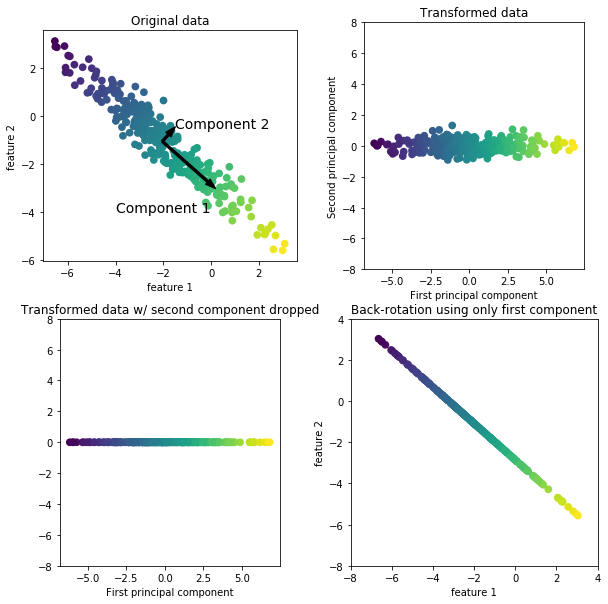

In [16]:
mglearn.plots.plot_pca_illustration()

In [17]:
# Before the rotation, the mean is subtracted, so the transofrmed data is centered around 0

In [18]:
# We can keep some of the principal component and drop the others
# We can then undo the rotation and add mean back to de data
# This will give us the points in the original feature space, but only information contains in the selected component left

In [19]:
# One of the most common applications of PCA is visualizing high-dimensional datasets

In [20]:
# Before applying PCA, we scale our data to unit variance using StandardScaler
cancer = load_breast_cancer()
scaler = StandardScaler().fit(X_train)
X_scaled = scaler.transform(cancer.data)

In [21]:
from sklearn.decomposition import PCA

In [22]:
pca = PCA(n_components=2).fit(X_scaled)
X_pca = pca.transform(X_scaled)
print('Original Shape: {}'.format(X_scaled.shape))
print('Reduced Shape: {}'.format(X_pca.shape))

Original Shape: (569, 30)
Reduced Shape: (569, 2)


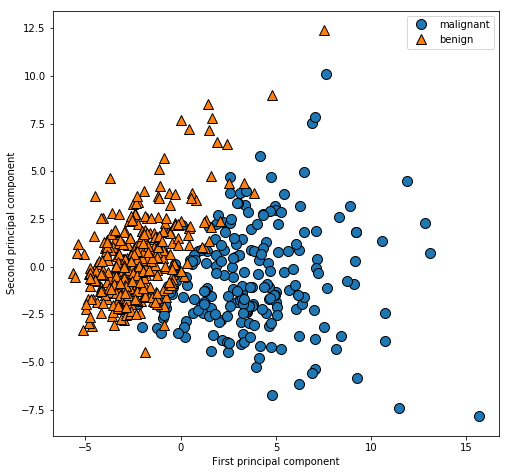

In [23]:
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc='best')
plt.gca().set_aspect('equal')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

A downside of PCA is that the principle component are often not easy to interpret. They correspond to directions in the original data, but in a complex way. They are combinations of the original features.

The principle components themselves are stored in the components_ attribute of the PCA object

In [24]:
print('PCA component shape: {}'.format(pca.components_.shape))

PCA component shape: (2, 30)


In [25]:
print('PCA components: \n{}'.format(pca.components_))

PCA components: 
[[ 0.21162071  0.10781133  0.22110213  0.21004456  0.14779604  0.2526455
   0.26320412  0.25932222  0.13956482  0.07406012  0.19430082  0.01874775
   0.20311889  0.18493359  0.01853146  0.18508148  0.15117641  0.19371271
   0.04498731  0.10859643  0.21982037  0.1060055   0.22928582  0.21282614
   0.13089673  0.22182652  0.24353553  0.25132406  0.12289296  0.14045931]
 [-0.2412808  -0.06939245 -0.22381814 -0.23405004  0.18039062  0.14403632
   0.04700402 -0.04775839  0.17812521  0.37267764 -0.10657391  0.09288067
  -0.09290845 -0.14723354  0.22231427  0.23713681  0.18127022  0.12819379
   0.184665    0.27794818 -0.22737131 -0.05486731 -0.20863032 -0.2220934
   0.16177527  0.13314486  0.08644784 -0.02360344  0.12570439  0.26796962]]


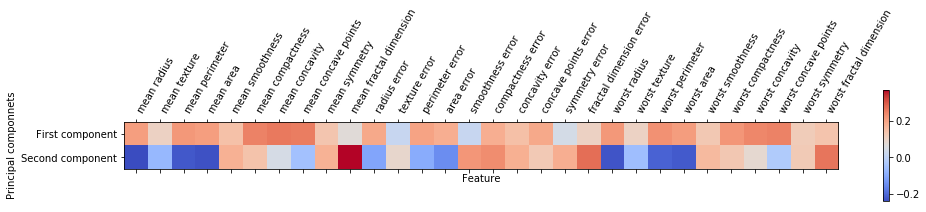

In [26]:
plt.matshow(pca.components_, cmap='coolwarm')
plt.yticks([0, 1], ['First component', 'Second component'])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)), cancer.feature_names, rotation=60, ha='left')
plt.xlabel('Feature')
plt.ylabel('Principal componnets')
plt.show()

Another application of PCA is feature extraction -- image data for example

In [27]:
from sklearn.datasets import fetch_lfw_people

In [28]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

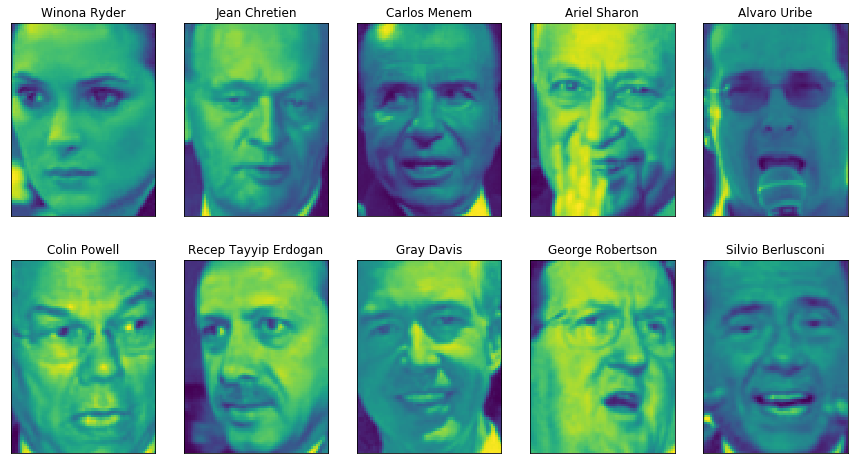

In [29]:
image_shape = people.images[0].shape
fig, axes = plt.subplots(2, 5, figsize=(15, 8), subplot_kw={'xticks': [], 'yticks': []})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])
plt.show()

In [30]:
print('people.images.shape: {}'.format(people.images.shape))
print('Number of classes: {}'.format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [31]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print('{0:25} {1:3}'.format(name, count), end='\t')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39	Alvaro Uribe               35	Amelie Mauresmo            21	
Andre Agassi               36	Angelina Jolie             20	Ariel Sharon               77	
Arnold Schwarzenegger      42	Atal Bihari Vajpayee       24	Bill Clinton               29	
Carlos Menem               21	Colin Powell              236	David Beckham              31	
Donald Rumsfeld           121	George Robertson           22	George W Bush             530	
Gerhard Schroeder         109	Gloria Macapagal Arroyo    44	Gray Davis                 26	
Guillermo Coria            30	Hamid Karzai               22	Hans Blix                  39	
Hugo Chavez                71	Igor Ivanov                20	Jack Straw                 28	
Jacques Chirac             52	Jean Chretien              55	Jennifer Aniston           21	
Jennifer Capriati          42	Jennifer Lopez             21	Jeremy Greenstock          24	
Jiang Zemin                20	John Ashcroft              53	John Negroponte            31	

To make the data less skewed, we will only take up to 50 images of each person, otherwise, the feature extraction would be overwhelmed by the likelyhood of Geoge W.bush

In [32]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target==target)[0][:50]] = 1
    X_people = people.data[mask]
    y_people = people.target[mask]
    X_people = X_people / 255

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
print('Test score of 1-knn: {:.2f}'.format(knn.score(X_test, y_test)))

Test score of 1-knn: 0.23


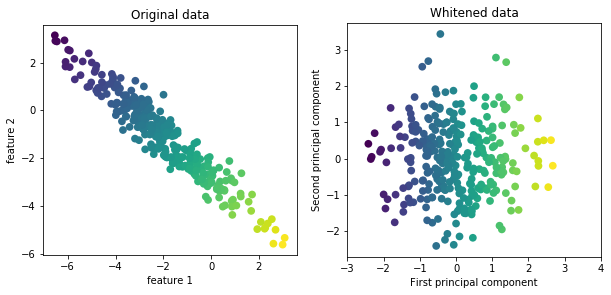

In [35]:
# Whitening = True is the same as using StandardScaler after the transformation
mglearn.plots.plot_pca_whitening()

In [36]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print('X_train_pca.shape: {}'.format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [37]:
knn = KNeighborsClassifier(n_neighbors=1).fit(X_train_pca, y_train)
print('Test set accuracy: {:.2f}'.format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.31


pca.components_.shape: (100, 5655)


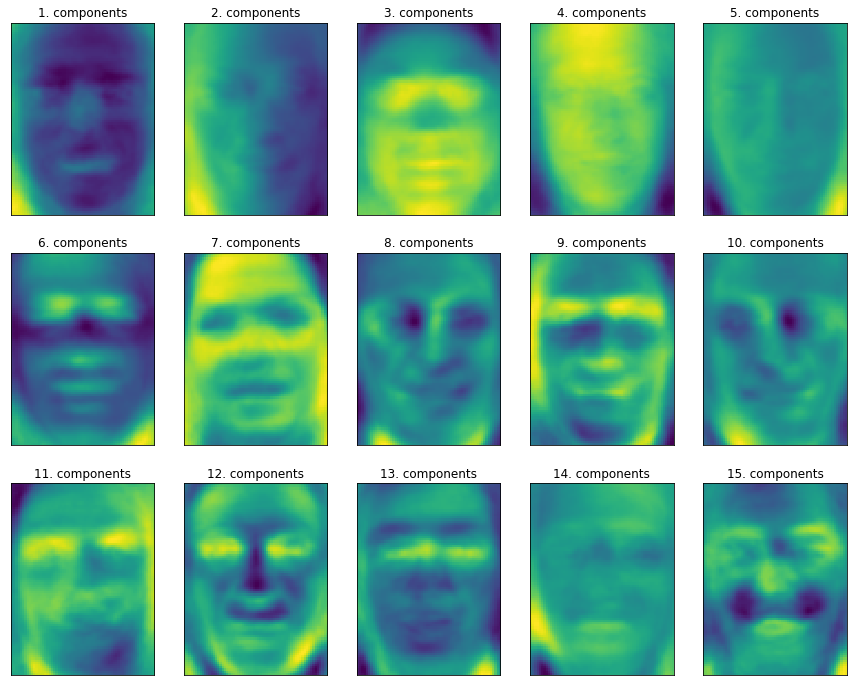

In [38]:
# View the principle components
print('pca.components_.shape: {}'.format(pca.components_.shape))
fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': [], 'yticks': []})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title('{}. components'.format((i+1)))

It is important to keep in mind that algorithms often interpret data(particularly visual data, such as images, which humans are very familiar with) quite differently from how a human would.

Another useful interpretation is to try to find some numbers(the new feature values after the pca ratation) so that we can express the test points as a weighted sum of the principal components.

The return to the original feature space can be done using the inverse_transform method

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 3.9s, 0.1min


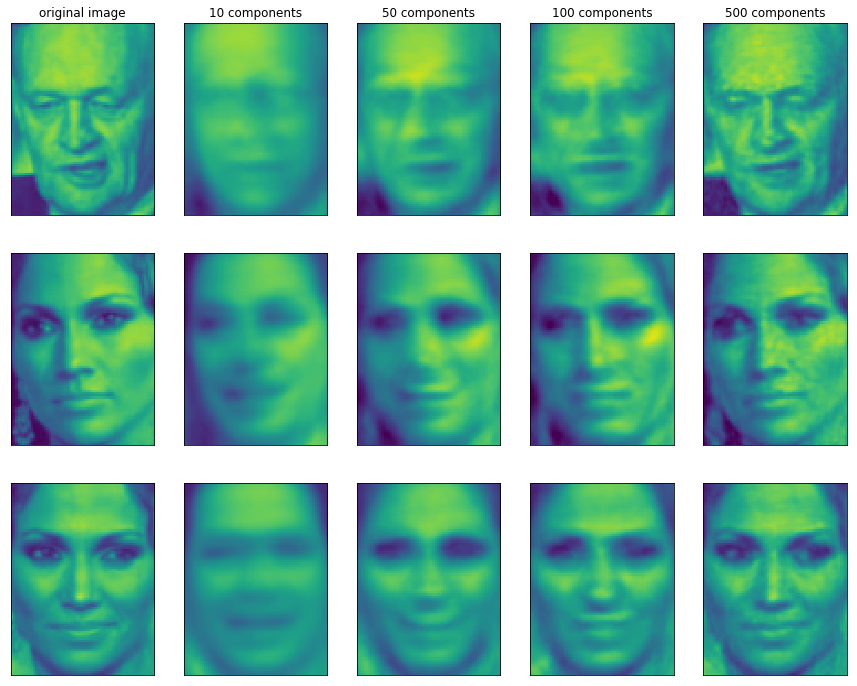

In [39]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)
plt.show()

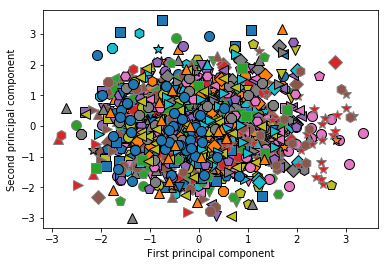

In [40]:
# We can use just the first 2 components to make a scatter plot
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

#### Non-negative Matrix Factorization(NMF)

Whereas in PCA we wanted components to be orthogonal and explain as much variance as possible, in NMF, we want both the components and the coefficients to be greater than or equal to 0.

This can be particularly helpful for data that is created as the addition (or overlay) of several independent sources, such as audio track of multiple people speaking.

The non-negative nature makes NMF results easier to understand than that of PCA in general

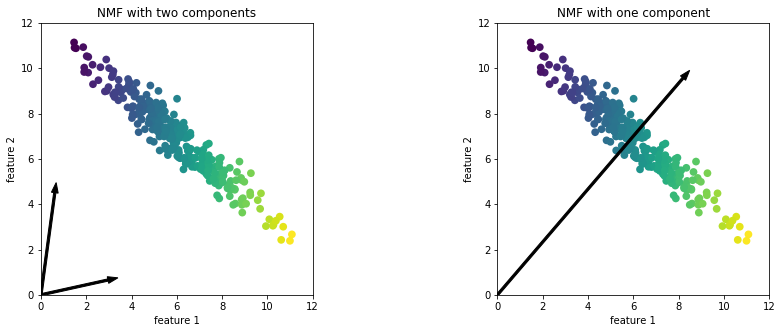

In [41]:
mglearn.plots.plot_nmf_illustration()

If there are enough components to perfectly reconstruct the data (as many components as there are features), the algorithm will choose directions that point towart the extremes of the data.

If we only use a single component, NMF creates a component that points toward the mean, as pointing there best explains the data.

As in contrast with PCA, reducing the number of components not only removes some directions, but creates an entirely different set of components.

Components in NMF are not ordered in a specific way, all of them play an equal part.

NMF use a random initialization, which might lead to different results depending on the random seed. In relatively simple cases where all the data can be explained perfectly, this has little effect, but in more complex situations, there might be more changes.

The reconstruction result of NMF will be a little worse than the PCA result, because PCA finds the optimum directions in terms of reconstruction, NMF doesn't do that, it is aiming to find interesting patterns within the data.

Let's see some of the components it has extracted

In [42]:
from sklearn.decomposition import NMF

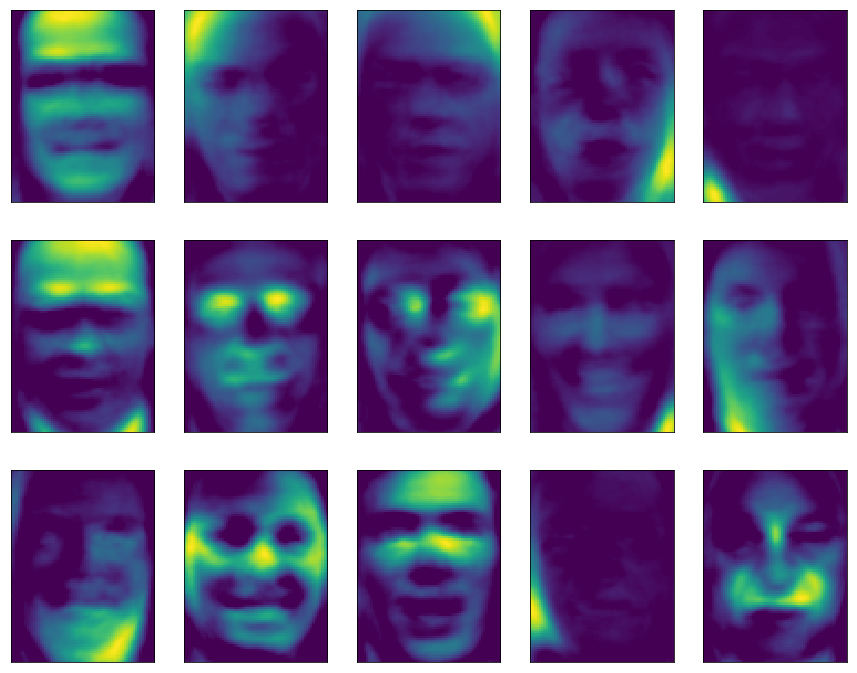

In [43]:
nmf = NMF(n_components=15, random_state=0).fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

fix, axes = plt.subplots(3, 5, figsize=(15, 12), subplot_kw={'xticks': [], 'yticks': []})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
plt.show()

Patters can be seen here, for example, there are components reprensents faces that are turning left/right

### Manifold learning with t-SNE

A class of algorithms for visualization -- barely used to generate more than 2 new features.

It can only tansform the data they have been trained for, can not trained on training set and then tranform the test set.

Good at EDA, not helpful in part of supervised learning.

The idea: find a two dimensional representation of the data that preserves the distances as best as possible.

It puts more emphasis on points that are close by, rather than preserving distances between far-apart points.

In other words, it tries to preserve the information indicating which points are neighbors to each other.

In [44]:
from sklearn.datasets import load_digits

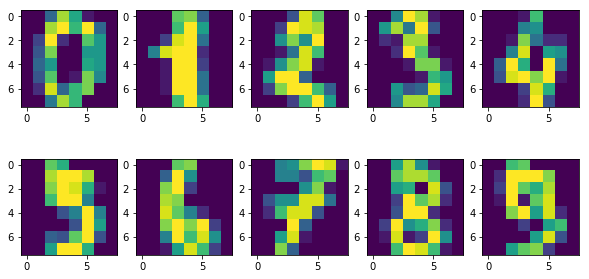

In [45]:
digits = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)
plt.show()

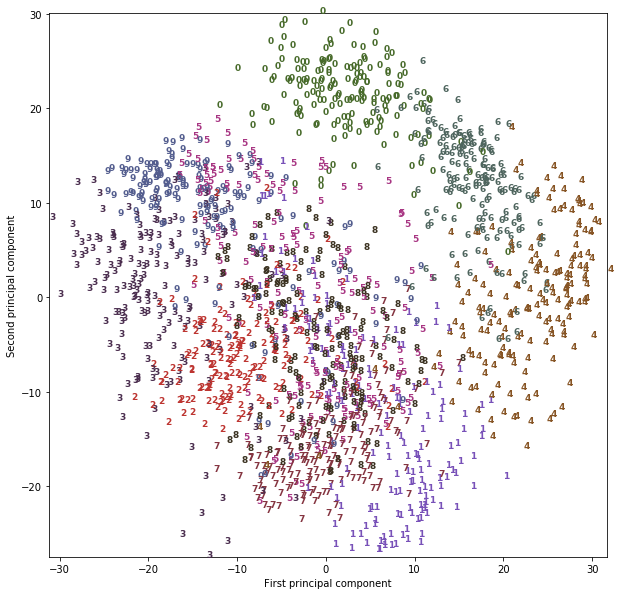

In [46]:
pca = PCA(n_components=2).fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color=colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9})
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.show()

In [47]:
from sklearn.manifold import TSNE

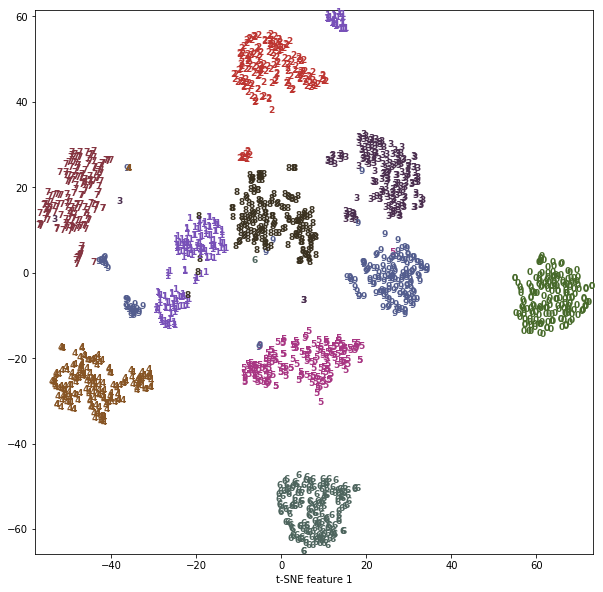

In [48]:
tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")
plt.show()

### Clustering

#### K-Means Clustering

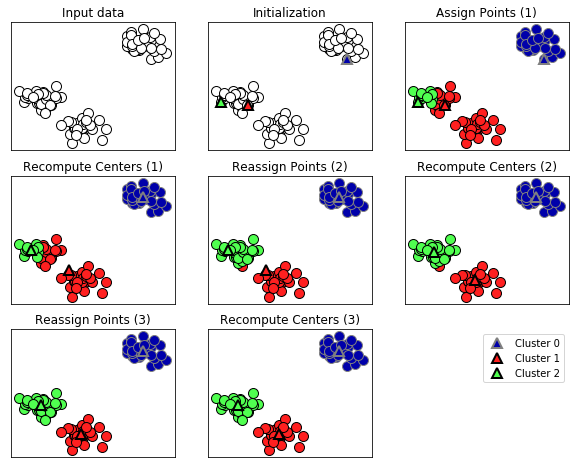

In [49]:
mglearn.plots.plot_kmeans_algorithm()

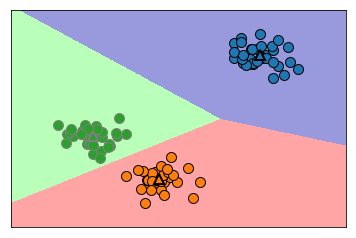

In [50]:
mglearn.plots.plot_kmeans_boundaries()

In [51]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [52]:
X, y = make_blobs(random_state=1)
kmeans = KMeans(n_clusters=3).fit(X)

In [53]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


In [54]:
print(kmeans.predict(X))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


You can see that clustering is somewhat similar to classification, in that each item gets a label. However, there is no ground truth, and consequently the labels themselves have no a priori meaning.
The only information the algorithm gives you is that all faces labeled as 3 are similar.

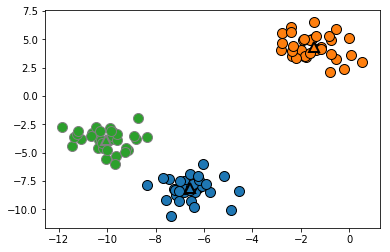

In [55]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)
plt.show()

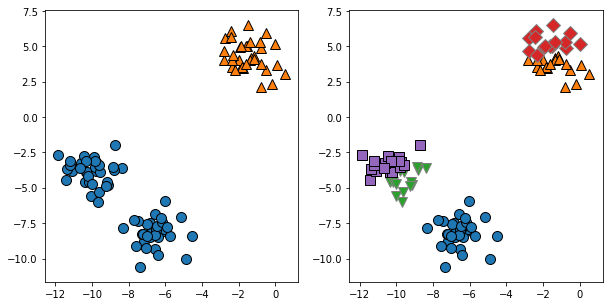

In [56]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

Each cluster is defined solely by its center, which means that each cluster is a convex shape. As a result of this, k-means can only capture relatively simple shapes. k-means also assumes that all clusters have the same “diameter” in some sense; it always draws the boundary between clusters to be exactly in the middle between the cluster centers.

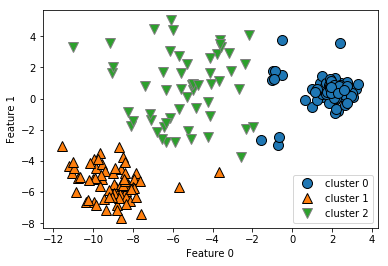

In [57]:
X_varied, y_varied = make_blobs(n_samples=200,
cluster_std=[1.0, 2.5, 0.5],
random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

k-means also assumes that all directions are equally important for each cluster.

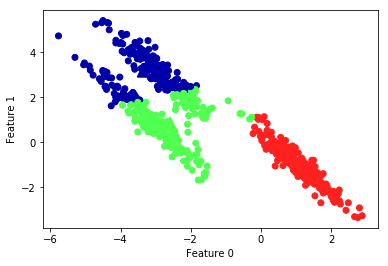

In [58]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

k-means also performs poorly if the clusters have more complex shapes

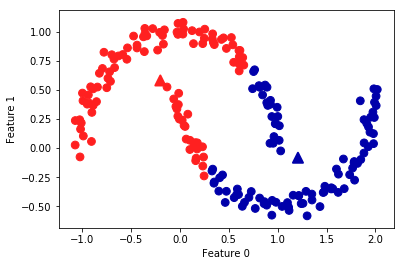

In [59]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

PCA and NMF tried to express the data points as a sum over some components. k-means, on the other hand, tries to represent each data point using a cluster center. You can think of that as each point being represented using only a single component, which is given by the cluster center. This view of k-means as a decomposition method, where each point is represented using a single component, is called vector quantization.

An interesting aspect of vector quantization using k-means is that we can use many more clusters than input dimensions to encode our data. Let’s go back to the two_moons data. Using PCA or NMF, there is nothing much we can do to this data, as it lives in only two dimensions. Reducing it to one dimension with PCA or NMF would completely destroy the structure of the data. But we can find a more expressive representation with k-means, by using more cluster centers

Cluster memberships:
[9 2 5 4 2 7 9 6 9 6 1 0 2 6 1 9 3 0 3 1 7 6 8 6 8 5 2 7 5 8 9 8 6 5 3 7 0
 9 4 5 0 1 3 5 2 8 9 1 5 6 1 0 7 4 6 3 3 6 3 8 0 4 2 9 6 4 8 2 8 4 0 4 0 5
 6 4 5 9 3 0 7 8 0 7 5 8 9 8 0 7 3 9 7 1 7 2 2 0 4 5 6 7 8 9 4 5 4 1 2 3 1
 8 8 4 9 2 3 7 0 9 9 1 5 8 5 1 9 5 6 7 9 1 4 0 6 2 6 4 7 9 5 5 3 8 1 9 5 6
 3 5 0 2 9 3 0 8 6 0 3 3 5 6 3 2 0 2 3 0 2 6 3 4 4 1 5 6 7 1 1 3 2 4 7 2 7
 3 8 6 4 1 4 3 9 9 5 1 7 5 8 2]


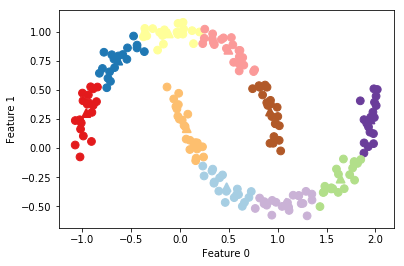

In [60]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

In [61]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.9220768  1.46553151 1.13956805 ... 1.16559918 1.03852189 0.23340263]
 [1.14159679 2.51721597 0.1199124  ... 0.70700803 2.20414144 0.98271691]
 [0.78786246 0.77354687 1.74914157 ... 1.97061341 0.71561277 0.94399739]
 ...
 [0.44639122 1.10631579 1.48991975 ... 1.79125448 1.03195812 0.81205971]
 [1.38951924 0.79790385 1.98056306 ... 1.97788956 0.23892095 1.05774337]
 [1.14920754 2.4536383  0.04506731 ... 0.57163262 2.11331394 0.88166689]]


k-means is a very popular algorithm for clustering, not only because it is relativelyeasy to understand and implement, but also because it runs relatively quickly. kmeans scales easily to large datasets, and scikit-learn even includes a more scalable variant in the MiniBatchKMeans class, which can handle very large datasets.

One of the drawbacks of k-means is that it relies on a random initialization.

By default, scikitlearn runs the algorithm 10 times with 10 different random initializations, and returns the best result

Further downsides of k-means are the relatively restrictive assumptions made on the shape of clusters, and the requirement to specify the number of clusters you are looking for (which might not be known in a real-world application).

#### Agglomerative clustering

the algorithm starts by declaring each point its own cluster,
and then merges the two most similar clusters until some stopping criterion is satisfied

There are several linkage criteria that specify how exactly the “most similar cluster” is
measured. This measure is always defined between two existing clusters

ward

The default choice, ward picks the two clusters to merge such that the variance
within all clusters increases the least. This often leads to clusters that are relatively
equally sized.
average

average linkage merges the two clusters that have the smallest average distance
between all their points.
complete

complete linkage (also known as maximum linkage) merges the two clusters that
have the smallest maximum distance between their points.

ward works on most datasets, and we will use it in our examples. If the clusters have
very dissimilar numbers of members (if one is much bigger than all the others, for
example), average or complete might work better.

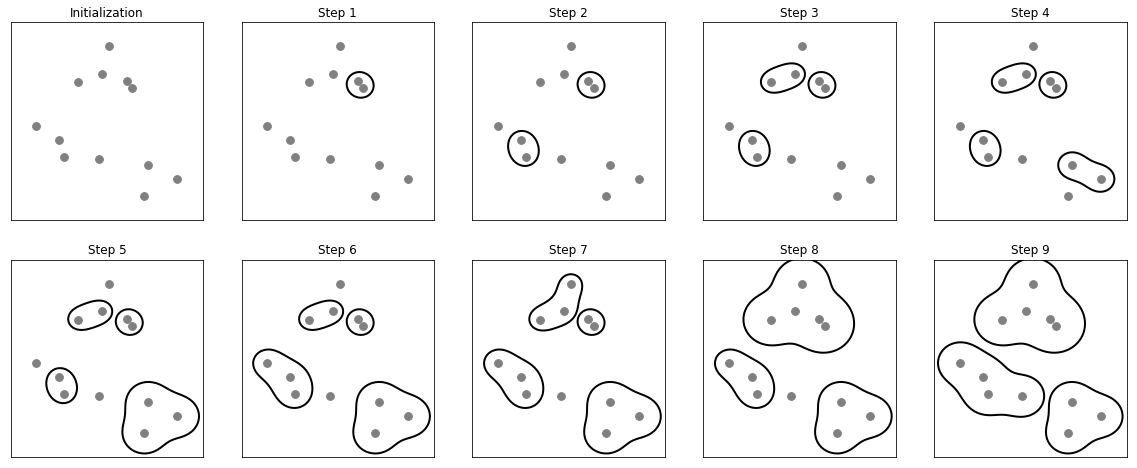

In [62]:
mglearn.plots.plot_agglomerative_algorithm()

Because of the way the algorithm works, agglomerative
clustering cannot make predictions for new data points. Therefore, Agglomerative
Clustering has no predict method. To build the model and get the cluster memberships
on the training set, use the fit_predict method instead.

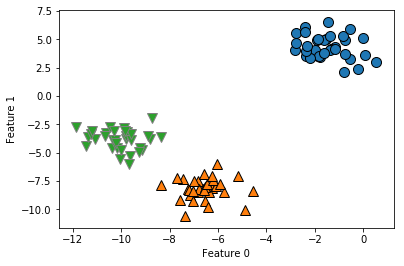

In [63]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

While the scikit-learn
implementation of agglomerative clustering requires you to specify the number of
clusters you want the algorithm to find, agglomerative clustering methods provide
some help with choosing the right number

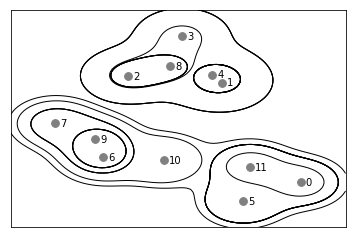

In [64]:
mglearn.plots.plot_agglomerative()

SciPy provides a function that takes a data array X and computes a linkage
array, which encodes hierarchical cluster similarities. We can then feed this linkage
array into the scipy dendrogram function to plot the dendrogram

In [65]:
from scipy.cluster.hierarchy import dendrogram, ward

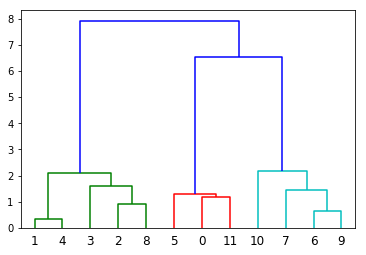

In [66]:
X, y = make_blobs(random_state=0, n_samples=12)
linkage_array = ward(X)
dendrogram(linkage_array)
plt.show()

The y-axis in the dendrogram doesn’t just specify when in the agglomerative algorithm
two clusters get merged. The length of each branch also shows how far apart
the merged clusters are. The longest branches in this dendrogram are the three lines
that are marked by the dashed line labeled “three clusters.” That these are the longest
branches indicates that going from three to two clusters meant merging some very
far-apart points.

Unfortunately, agglomerative clustering still fails at separating complex shapes like
the two_moons dataset

#### DBSCAN

The main benefits of DBSCAN
are that it does not require the user to set the number of clusters a priori, it can capture
clusters of complex shapes, and it can identify points that are not part of any
cluster.

DBSCAN is somewhat slower than agglomerative clustering and k-means, but
still scales to relatively large datasets

The idea behind DBSCAN is that clusters form dense
regions of data, separated by regions that are relatively empty.

Points that are within a dense region are called core samples (or core points), and they
are defined as follows. There are two parameters in DBSCAN: min_samples and eps.
If there are at least min_samples many data points within a distance of eps to a given
data point, that data point is classified as a core sample. Core samples that are closer
to each other than the distance eps are put into the same cluster by DBSCAN.

In [67]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


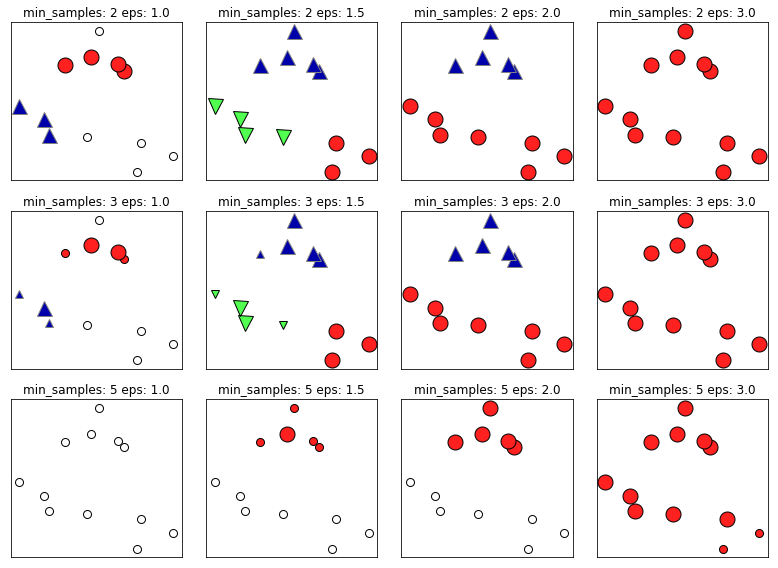

In [68]:
mglearn.plots.plot_dbscan()

Increasing eps (going from left to right in the figure)
means that more points will be included in a cluster. This makes clusters grow, but
might also lead to multiple clusters joining into one. Increasing min_samples (going
from top to bottom in the figure) means that fewer points will be core points, and
more points will be labeled as noise.

While DBSCAN doesn’t require setting the number of clusters explicitly, setting eps
implicitly controls how many clusters will be found. Finding a good setting for eps is
sometimes easier after scaling the data using StandardScaler or MinMaxScaler, as
using these scaling techniques will ensure that all features have similar ranges

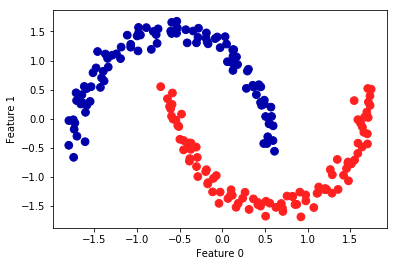

In [69]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

As shown above, DBSCAN can handle very complex shapes

### Comparing and Evaluating Clustering Algorithms

#### With ground truth: Adjusted rand index(ARI) and normailized mutual information(NMI)

In [70]:
from sklearn.metrics.cluster import adjusted_rand_score

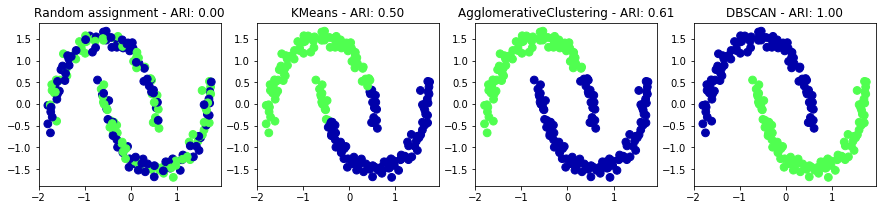

In [71]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

fig, axes = plt.subplots(1, 4, figsize=(15, 3))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))

for ax, algorithm in zip(axes[1:], algorithms):
    # plot the cluster assignments and cluster centers
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60)
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))
plt.show()

#### without ground truth: silhouette coefficient -- doesn't work well in practice

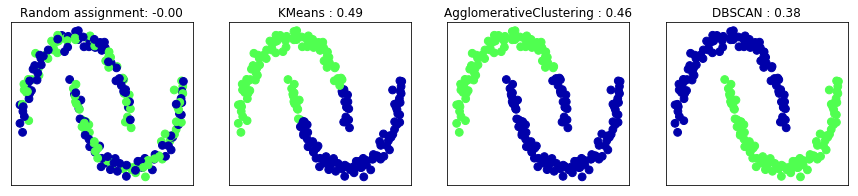

In [72]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
subplot_kw={'xticks': (), 'yticks': ()})
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    # plot the cluster assignments and cluster centers
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
    s=60)
    ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
    silhouette_score(X_scaled, clusters)))
plt.show()

##### The only way to know whether the clustering corresponds to anything we are interested in is to analyze the clusters manually.

All three have a way of controlling the granularity of clustering. k-means and
agglomerative clustering allow you to specify the number of desired clusters, while
DBSCAN lets you define proximity using the eps parameter, which indirectly influences
cluster size. All three methods can be used on large, real-world datasets, are relatively
easy to understand, and allow for clustering into many clusters.

Each of the algorithms has somewhat different strengths. k-means allows for a characterization
of the clusters using the cluster means. It can also be viewed as a decomposition
method, where each data point is represented by its cluster center. DBSCAN
allows for the detection of “noise points” that are not assigned any cluster, and it can
help automatically determine the number of clusters. In contrast to the other two
methods, it allow for complex cluster shapes, as we saw in the two_moons example.
DBSCAN sometimes produces clusters of very differing size, which can be a strength
or a weakness. Agglomerative clustering can provide a whole hierarchy of possible
partitions of the data, which can be easily inspected via dendrograms.